In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import time
import sys 
sys.path.append("C:/Users/Akhand/PycharmProjects/second")

In [638]:
# data loading
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
pro_ex = pd.read_csv('promotional_expense.csv')
hol_details = pd.read_excel('holidays.xlsx')

In [643]:
hol_details

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag
5,"2014, 5, 16",Denmark,Store bededag
6,"2014, 5, 29",Denmark,Kristi himmelfartsdag
7,"2014, 6, 8",Denmark,Pinsedag
8,"2014, 6, 9",Denmark,Anden pinsedag
9,"2014, 12, 25",Denmark,Juledag


In [642]:
train.groupby(['Month','Country']).Merchant_ID.agg('count')

Month  Country  
1      Argentina     949
       Belgium       176
       Columbia     3698
       Denmark      1411
       England       511
       Finland       719
2      Argentina     966
       Belgium       183
       Columbia     3486
       Denmark      1365
       England       475
       Finland       687
3      Argentina    1027
       Belgium       185
       Columbia     3758
       Denmark      1512
       England       524
       Finland       693
4      Argentina     867
       Belgium       142
       Columbia     2975
       Denmark      1174
       England       511
       Finland       732
5      Argentina     846
       Belgium       147
       Columbia     3060
       Denmark      1013
       England       523
       Finland       688
                    ... 
8      Argentina     829
       Belgium       149
       Columbia     2586
       Denmark      1105
       England       453
       Finland       711
9      Argentina     834
       Belgium       152
       C

In [641]:
train[train['Merchant_ID'] == 'ar000011']

,S_No,Year,Month,Week,Merchant_ID,Product_ID,Country,Sales
5,6,2013,1,1,ar000011,1,Argentina,0.0
71,72,2013,1,3,ar000011,1,Argentina,472500.0
225,226,2013,2,7,ar000011,1,Argentina,472500.0
302,303,2013,2,9,ar000011,1,Argentina,472500.0
427,428,2013,3,12,ar000011,1,Argentina,472500.0
533,534,2013,4,15,ar000011,1,Argentina,472500.0
571,572,2013,4,16,ar000011,1,Argentina,472500.0
657,658,2013,5,18,ar000011,1,Argentina,472500.0
761,762,2013,5,21,ar000011,1,Argentina,472500.0
797,798,2013,5,22,ar000011,1,Argentina,472500.0


In [639]:
hol_details

,Date,Country,Holiday
0,"2014, 1, 1",Denmark,Nytårsdag
1,"2014, 4, 17",Denmark,Skærtorsdag
2,"2014, 4, 18",Denmark,Langfredag
3,"2014, 4, 20",Denmark,Påskedag
4,"2014, 4, 21",Denmark,Anden påskedag
5,"2014, 5, 16",Denmark,Store bededag
6,"2014, 5, 29",Denmark,Kristi himmelfartsdag
7,"2014, 6, 8",Denmark,Pinsedag
8,"2014, 6, 9",Denmark,Anden pinsedag
9,"2014, 12, 25",Denmark,Juledag


In [4]:
print(train.shape)
print(test.shape)
print(pro_ex.shape)
print(hol_details.shape)

(79072, 8)
(105, 6)
(435, 5)
(652, 3)


In [539]:
train.sort_values(['Year','Month'],inplace = True)

In [541]:
train[(train['Country'] == 'Columbia') &(train['Product_ID'] == 1)]['Sales'].sum()

151697076.69

In [174]:
trained = train.groupby(['Year','Month','Product_ID','Country']).Sales.sum().reset_index()

In [371]:
trained

,Year,Month,Product_ID,Country,Sales
0,2013,1,1,Argentina,3.434602e+07
1,2013,1,1,Columbia,3.947356e+06
2,2013,1,2,Argentina,2.751851e+06
3,2013,1,2,Belgium,3.148501e+05
4,2013,1,2,Columbia,2.885137e+06
5,2013,1,2,Denmark,1.018476e+08
6,2013,1,4,England,1.669076e+05
7,2013,1,4,Finland,1.515342e+07
8,2013,1,5,England,4.623706e+05
9,2013,2,1,Argentina,3.200558e+07


In [20]:
print(train['Year'].value_counts())
print(train['Merchant_ID'].value_counts())
print(train['Product_ID'].value_counts())
print(train['Country'].value_counts())

2015    24167
2014    23875
2013    22840
2016     8190
Name: Year, dtype: int64
c0000324     367
ar000052     366
ar000012     340
ar000038     335
ar000040     330
ar000043     326
ar0000100    317
c0000325     313
ar000059     285
ar000014     281
c000055      279
ar000034     278
c0000226     276
ar000011     273
ar000016     272
e000012      269
e00008       267
c0000305     266
c0000365     264
ar000044     263
c0000321     263
ar000063     261
e0000186     261
e000014      258
c0000347     258
ar000079     254
ar000015     254
ar000039     244
e00006       244
ar000041     243
            ... 
d0000348       1
e0000193       1
d0000642       1
d0000597       1
d0000197       1
c0000613       1
ar000047       1
d0000265       1
d0000135       1
d0000579       1
c0000256       1
e0000212       1
d0000487       1
e000050        1
d0000804       1
e000075        1
d0000247       1
d0000780       1
e000080        1
e000072        1
e000082        1
d000066        1
d0000589       1
e

In [22]:
print(test['Year'].value_counts())
# print(test['Merchant_ID'].value_counts())
print(test['Product_ID'].value_counts())
print(test['Country'].value_counts())

2016    75
2017    24
2015     6
Name: Year, dtype: int64
2    48
1    24
4    18
5     9
3     6
Name: Product_ID, dtype: int64
Argentina    27
Columbia     27
England      18
Belgium      12
Denmark      12
Finland       9
Name: Country, dtype: int64


In [405]:
trained = train.groupby(['Year','Month','Merchant_ID','Product_ID','Country']).Sales.sum().reset_index()

In [372]:
train[(train['Year'] == 2015) & (train['Month'] == 11)].Product_ID.unique()

array([1, 2, 3], dtype=int64)

In [386]:
len(train[(train['Product_ID'] == ) & (train['Country'] == 'Columbia')].Merchant_ID.unique())

0

In [399]:
tri = train.groupby(['Merchant_ID','Product_ID','Country']).Week.agg('count').reset_index().sort_values(['Product_ID','Country'])

In [400]:
tri

,Merchant_ID,Product_ID,Country,Week
0,ar00000,1,Argentina,5
1,ar00001,1,Argentina,90
2,ar000010,1,Argentina,19
5,ar0000100,1,Argentina,138
8,ar0000101,1,Argentina,1
9,ar0000102,1,Argentina,16
11,ar0000103,1,Argentina,9
12,ar0000104,1,Argentina,1
13,ar0000105,1,Argentina,6
15,ar0000106,1,Argentina,38


In [406]:
tested = tri.merge(test,how = 'left',on = ['Product_ID','Country'])

In [402]:
tri2

,Merchant_ID,Product_ID,Country,Week,S_No,Year,Month,Sales
0,ar00000,1,Argentina,5,79073,2016,4,NaN
1,ar00000,1,Argentina,5,79074,2016,5,NaN
2,ar00000,1,Argentina,5,79075,2016,6,NaN
3,ar00000,1,Argentina,5,79076,2016,7,NaN
4,ar00000,1,Argentina,5,79077,2016,8,NaN
5,ar00000,1,Argentina,5,79078,2016,9,NaN
6,ar00000,1,Argentina,5,79079,2016,10,NaN
7,ar00000,1,Argentina,5,79080,2016,11,NaN
8,ar00000,1,Argentina,5,79081,2016,12,NaN
9,ar00000,1,Argentina,5,79082,2017,1,NaN


In [398]:
test

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,Argentina,NaN
1,79074,2016,5,1,Argentina,NaN
2,79075,2016,6,1,Argentina,NaN
3,79076,2016,7,1,Argentina,NaN
4,79077,2016,8,1,Argentina,NaN
5,79078,2016,9,1,Argentina,NaN
6,79079,2016,10,1,Argentina,NaN
7,79080,2016,11,1,Argentina,NaN
8,79081,2016,12,1,Argentina,NaN
9,79082,2017,1,1,Argentina,NaN


In [396]:
tri.isnull().sum()

Merchant_ID        0
Product_ID         0
Country            0
Week               0
S_No               0
Year               0
Month              0
Sales          25923
dtype: int64

In [26]:
pro_ex.isnull().sum()

Year             0
Month            0
Country          0
Product_Type     0
Expense_Price    0
dtype: int64

In [63]:
pro_ex.head()

,Year,Month,Country,Product_ID,Expense_Price
0,2013,1,Argentina,1,14749.307
1,2013,1,Argentina,2,1329.374
2,2013,1,Belgium,2,249.590
3,2013,1,Columbia,1,1893.122
4,2013,1,Columbia,2,1436.726


In [173]:
pro_ex.columns = ['Year','Month','Country','Product_ID','Expense_Price']

In [58]:
pro_ex.shape

(435, 5)

In [27]:
hol_details.isnull().sum()

Date       0
Country    0
Holiday    0
dtype: int64

In [ ]:
hol_details['Year'] = hol_details['Date'].str.split(expand = True)[0].str[0:4]
hol_details['Month'] = hol_details['Date'].str.split(expand = True)[1].str[:-1]

In [166]:
hol_details = hol_details.groupby(['Country','Year','Month']).Date.agg('count').reset_index()
hol_details.columns = ['Country', 'Year', 'Month', 'No_of_holidays']

In [170]:
hol_details.columns

Index(['Country', 'Year', 'Month', 'Date'], dtype='object')

In [40]:
sample = pd.read_csv('sample_submission.csv')

In [408]:
data = trained.merge(pro_ex,how = 'left',on = ['Year','Month','Product_ID','Country'])

In [420]:
test_d = tested.merge(pro_ex,how = 'left',on = ['Year','Month','Product_ID','Country'])

In [410]:
info = data.groupby(['Country','Month']).Expense_Price.mean().reset_index()

In [411]:
info_train = data.merge(info,how = 'left',on = ['Month','Country'])
model = info_train['Expense_Price_x'].isnull()
info_train.loc[model,'Expense_Price_x'] = info_train.loc[model,'Expense_Price_y']

In [421]:
info_test = test_d.merge(info,how = 'left',on = ['Month','Country'])
model = info_test['Expense_Price_x'].isnull()
info_test.loc[model,'Expense_Price_x'] = info_test.loc[model,'Expense_Price_y']

In [422]:
info_train.drop(['Expense_Price_y'],axis = 1,inplace = True)
info_test.drop(['Expense_Price_y'],axis = 1,inplace = True)

In [187]:
hol_details['Year'] = hol_details['Year'].astype('int64')
hol_details['Month'] = hol_details['Month'].astype('int64')

In [499]:
info1 = info_train.merge(hol_details,how = 'left',on = ['Country','Year','Month'])
info1.fillna(0,inplace = True)
info2 = info_test.merge(hol_details,how = 'left',on = ['Country','Year','Month'])
info2.fillna(0,inplace = True)

In [500]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in info2.columns.values:
    if info2[col].dtypes == 'object':
        le.fit(info2[col].astype(str))
        info2[col] = le.transform(info2[col].astype(str))

In [417]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in info_train.columns.values:
    if info1[col].dtypes == 'object':
        le.fit(info1[col].astype(str))
        info1[col] = le.transform(info1[col].astype(str))

In [418]:
info1.shape

(36058, 8)

In [426]:
info2.shape

(25923, 9)

In [19]:
with open('train_data.bin','wb') as file:
    pickle.dump(info2,file)
with open('test_data.bin','wb') as file:
    pickle.dump(info_test,file)

In [42]:
with open('train_data.bin','rb') as file:
    info2 = pickle.load(file)
with open('test_data.bin','rb') as file:
    info_test = pickle.load(file)

In [428]:
info1.head()

,Year,Month,Merchant_ID,Product_ID,Country,Sales,Expense_Price_x,No_of_holidays
0,2013,1,1,1,0,551250.00,14749.307,1.0
1,2013,1,3,1,0,239400.00,14749.307,1.0
2,2013,1,3,2,0,26230.82,1329.374,1.0
3,2013,1,5,1,0,3150.00,14749.307,1.0
4,2013,1,5,2,0,16692.34,1329.374,1.0


In [427]:
info1.corr()

,Year,Month,Merchant_ID,Product_ID,Country,Sales,Expense_Price_x,No_of_holidays
Year,1.000000,-0.131472,-0.111226,0.014674,-0.114902,0.008940,0.096174,0.089038
Month,-0.131472,1.000000,-0.006004,0.026619,-0.006219,0.002231,0.017628,-0.074724
Merchant_ID,-0.111226,-0.006004,1.000000,0.714342,0.905487,0.032507,0.261049,-0.185546
Product_ID,0.014674,0.026619,0.714342,1.000000,0.661279,-0.000589,-0.087193,-0.157710
Country,-0.114902,-0.006219,0.905487,0.661279,1.000000,0.016611,0.154976,-0.160459
Sales,0.008940,0.002231,0.032507,-0.000589,0.016611,1.000000,0.136174,-0.011125
Expense_Price_x,0.096174,0.017628,0.261049,-0.087193,0.154976,0.136174,1.000000,-0.084093
No_of_holidays,0.089038,-0.074724,-0.185546,-0.157710,-0.160459,-0.011125,-0.084093,1.000000


In [203]:
import modelling_reg

In [542]:
X = info1[[cols for cols in info1.columns if cols not in['Sales','Expense_Price_x','No_of_holidays']]]
Y = info1[['Sales']]

In [263]:
X.columns

Index(['Year', 'Month', 'Product_ID', 'Country', 'Expense_Price_x',
       'No_of_holidays'],
      dtype='object')

In [432]:
info1.isnull().sum()

Year               0
Month              0
Merchant_ID        0
Product_ID         0
Country            0
Sales              0
Expense_Price_x    0
No_of_holidays     0
dtype: int64

   Year  Month  Merchant_ID  Product_ID  Country  Expense_Price_x  \
0  2013      1            1           1        0        14749.307   
1  2013      1            3           1        0        14749.307   
2  2013      1            3           2        0         1329.374   
3  2013      1            5           1        0        14749.307   
4  2013      1            5           2        0         1329.374   

   No_of_holidays  
0             1.0  
1             1.0  
2             1.0  
3             1.0  
4             1.0  
            Sales
0       551250.00
1       239400.00
2        26230.82
3         3150.00
4        16692.34
5        14175.00
6       472500.00
7       228923.52
8       189000.00
9       157384.92
10      291375.00
11      186000.36
12       28350.00
13       22050.00
14        2384.62
15       78750.00
16     1575000.00
17        7153.86
18        9450.00
19        4725.00
20      189000.00
21      204750.00
22       23846.20
23       14307.72
24       77175.

C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


cv_resultsKNN [nan nan nan nan]
KNN: nan (nan)


C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))


cv_resultsCART [nan nan nan nan]
CART: nan (nan)


C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

cv_resultsSVM [1091954.38964462 1114592.23258121 1170928.54992906 1167786.26819324]
SVM: 1136315.360087 (34015.735092)


C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:/Users/Akhand/PycharmProjects/second\modelling_reg.py:42: RuntimeWarning: invalid value encountered in true_divide
  return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
C:\Users\Akhand\Anaconda3\lib\site-p

cv_resultsRF [nan nan nan nan]
RF: nan (nan)
cv_resultsXGB [1264242.55382496 1236244.80854606 1275200.34512061 1263610.05524428]
XGB: 1259824.440684 (14372.439688)


C:\Users\Akhand\Anaconda3\lib\site-packages\numpy\lib\function_base.py:4291: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)
C:\Users\Akhand\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1872: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = np.compress(x <= hival, x)
C:\Users\Akhand\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1879: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = np.compress(x >= loval, x)
C:\Users\Akhand\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1887: RuntimeWarning: invalid value encountered in less
  np.compress(x < stats['whislo'], x),
C:\Users\Akhand\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1888: RuntimeWarning: invalid value encountered in greater
  np.compress(x > stats['whishi'], x)


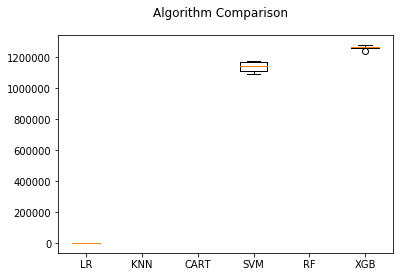

In [644]:
modelling_reg.modelling(info1,info_test)

In [350]:
X['Year'] = X['Year'].astype('object')
X['Month'] = X['Month'].astype('object')
X['Product_ID'] = X['Product_ID'].astype('object')

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pand

In [560]:
# Parameter tuning
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
def smape(estimator,X, A):
    F = estimator.predict(X)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'n_neighbors':2,
 'weights':'distance',
 'algorithm':'ball_tree',
 'leaf_size': 40
}
model = KNeighborsRegressor(**param_test2)
kfold = model_selection.KFold(n_splits=3, random_state=25)
cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=smape)
print(cv_results.mean())
# gsearch2 = GridSearchCV(estimator = KNeighborsRegressor(),param_grid = param_test2, scoring=smape,n_jobs=4,iid=False, cv=3)
# # print(gsearch2)
# gsearch2.fit(info2[[cols for cols in info2.columns if cols not in['Sales']]],info2[['Sales']])
# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

63.18539919681291


In [615]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(info1[[cols for cols in info1.columns if cols not in['Sales','Expense_Price_x','No_of_holidays']]],
                                                        info1['Sales'], test_size=0.4, random_state=22)

In [616]:
param_test2 = {
 'n_neighbors':3,
 'weights':'distance',
 'algorithm':'auto',
 'leaf_size': 40
}
model = KNeighborsRegressor(**param_test2)

In [617]:
model.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [618]:
x_test['new_pred'] = model.predict(x_test)
x_test['old_pred'] = y_test

In [619]:
tester = x_test.groupby(['Year','Month','Product_ID','Country']).sum().reset_index()

In [620]:
A = tester['old_pred']
F = tester['new_pred']

In [621]:
print(100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))

32.44922442419537


In [622]:
model.fit(X,Y)

KNeighborsRegressor(algorithm='auto', leaf_size=40, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='distance')

In [493]:
X.columns

Index(['Year', 'Month', 'Merchant_ID', 'Product_ID', 'Country',
       'Expense_Price_x', 'No_of_holidays'],
      dtype='object')

In [501]:
info2 = info2.drop(['Week','S_No','Sales'],axis = 1)

In [562]:
info2 = info2[['Year', 'Month', 'Merchant_ID', 'Product_ID', 'Country']]

In [563]:
info2

,Year,Month,Merchant_ID,Product_ID,Country
0,2016,4,0,1,0
1,2016,5,0,1,0
2,2016,6,0,1,0
3,2016,7,0,1,0
4,2016,8,0,1,0
5,2016,9,0,1,0
6,2016,10,0,1,0
7,2016,11,0,1,0
8,2016,12,0,1,0
9,2017,1,0,1,0


In [623]:
pred = model.predict(info2)

In [624]:
pred

array([[2.10525000e+05],
       [4.13718532e+05],
       [4.26475151e+05],
       ...,
       [2.75780648e+02],
       [2.87710971e+02],
       [2.48330840e+02]])

In [625]:
info2['Sales'] = pred

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [626]:
f = info2.groupby(['Year','Month','Product_ID','Country']).sum().reset_index()

In [630]:
f

,Year,Month,Product_ID,Country,Merchant_ID,Sales
0,2015,11,4,4,179222,3.374710e+05
1,2015,11,4,5,244501,3.776571e+07
2,2015,11,5,4,292821,1.456828e+06
3,2015,12,4,4,179222,4.789749e+05
4,2015,12,4,5,244501,4.016856e+07
5,2015,12,5,4,292821,1.533346e+06
6,2016,1,4,4,179222,4.467025e+05
7,2016,1,4,5,244501,6.420228e+07
8,2016,1,5,4,292821,1.417806e+06
9,2016,2,4,4,179222,2.905068e+05


In [631]:
test_2

,S_No,Year,Month,Product_ID,Country,Sales
0,79073,2016,4,1,0,NaN
1,79074,2016,5,1,0,NaN
2,79075,2016,6,1,0,NaN
3,79076,2016,7,1,0,NaN
4,79077,2016,8,1,0,NaN
5,79078,2016,9,1,0,NaN
6,79079,2016,10,1,0,NaN
7,79080,2016,11,1,0,NaN
8,79081,2016,12,1,0,NaN
9,79082,2017,1,1,0,NaN


In [632]:
final = test_2.merge(f,how = 'left',on = ['Year','Month','Product_ID','Country'])

In [633]:
final

,S_No,Year,Month,Product_ID,Country,Sales_x,Merchant_ID,Sales_y
0,79073,2016,4,1,0,NaN,5864,4.458520e+07
1,79074,2016,5,1,0,NaN,5864,4.875464e+07
2,79075,2016,6,1,0,NaN,5864,6.416838e+07
3,79076,2016,7,1,0,NaN,5864,4.599056e+07
4,79077,2016,8,1,0,NaN,5864,4.022338e+07
5,79078,2016,9,1,0,NaN,5864,4.518413e+07
6,79079,2016,10,1,0,NaN,5864,3.542270e+07
7,79080,2016,11,1,0,NaN,5864,2.939349e+07
8,79081,2016,12,1,0,NaN,5864,3.189787e+07
9,79082,2017,1,1,0,NaN,5864,2.821053e+07


In [627]:
test_2 = test

In [628]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in test_2.columns.values:
    if test_2[col].dtypes == 'object':
        le.fit(test_2[col].astype(str))
        test_2[col] = le.transform(test_2[col].astype(str))

In [529]:
final

,S_No,Year,Month,Product_ID,Country,Sales_x,Merchant_ID,Expense_Price_x,No_of_holidays,Sales_y
0,79073,2016,4,1,0,NaN,5864,8.461321e+05,103.0,3.340820e+07
1,79074,2016,5,1,0,NaN,5864,1.110121e+06,206.0,7.119822e+07
2,79075,2016,6,1,0,NaN,5864,1.063029e+06,206.0,4.381458e+07
3,79076,2016,7,1,0,NaN,5864,7.598915e+05,103.0,7.954695e+07
4,79077,2016,8,1,0,NaN,5864,1.009988e+06,103.0,1.061779e+08
5,79078,2016,9,1,0,NaN,5864,9.656745e+05,0.0,7.820260e+07
6,79079,2016,10,1,0,NaN,5864,7.503447e+05,103.0,7.954695e+07
7,79080,2016,11,1,0,NaN,5864,1.069288e+06,103.0,4.381458e+07
8,79081,2016,12,1,0,NaN,5864,7.071343e+05,206.0,7.954695e+07
9,79082,2017,1,1,0,NaN,5864,1.102553e+06,103.0,4.499618e+07


In [634]:
result = final['Sales_y']

In [511]:
result = info2.groupby(['Year','Month','Product_ID','Country']).sum().reset_index()['Sales']

In [513]:
len(result)

105

In [458]:
def smape(model,X, A):
    F = model.predict(X)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [459]:
a = smape(model,teste[,y_test)

In [460]:
a

106.38328477738634

In [456]:
pred

884.0983333333334

In [454]:
y_test

19973      7420.00
17579      2436.96
870        7153.86
32371    562275.00
9090       4800.00
3248          0.00
4227        547.79
6077        164.34
7787      53969.06
19368      2023.80
20902       952.45
19459         0.00
16334      4800.00
32093     36800.00
24933      5168.96
7817       1095.61
33453     72000.00
4887       3200.00
35704      1484.00
22534      1600.00
15130     65937.20
11660      5143.26
27767     32100.27
27450       742.00
27258         0.00
9061       1600.00
3606      59147.49
19006     12800.00
7684          0.00
26145     13356.00
           ...    
28069     59200.00
18742     14400.00
24822         0.00
22784     97600.00
11266         0.00
31480         0.00
13913      9733.90
20525     21461.58
4106          0.00
30347       742.00
18036      2226.00
1087        857.21
6547      16000.00
32752      8000.00
24587      6400.00
12602     15429.78
31393         0.00
8721        109.56
14105    146093.45
3665       3428.84
6352       2571.63
22258    262

In [441]:
prediction_xgb = model_selection.cross_val_predict(model,X,Y,cv=kfold)

In [445]:
Y

,Sales
0,551250.00
1,239400.00
2,26230.82
3,3150.00
4,16692.34
5,14175.00
6,472500.00
7,228923.52
8,189000.00
9,157384.92


In [444]:
prediction_xgb

array([[184275.        ],
       [184275.        ],
       [  9027.66666667],
       ...,
       [ 47466.66666667],
       [ 28266.66666667],
       [ 30133.33333333]])

In [440]:
model.fit(X,Y)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [ ]:
y_pred = model.predict()

In [555]:
# Parameter tuning
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
def smape(estimator,X, A):
    F = estimator.predict(X)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'fit_intercept':True, 
 'normalize':True,
 }
model = LinearRegression(**param_test2)
kfold = model_selection.KFold(n_splits=3, random_state=25)
cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=smape)
print(cv_results.mean())

159.19513652169175


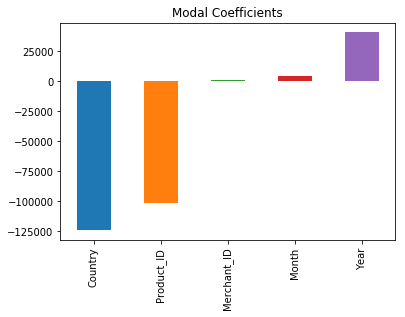

In [557]:
model.fit(X,Y)
predictors = X.columns
coef = pd.Series(model.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [341]:
def smape(estimator,X, A):
    F = estimator.predict(X)
    return 100/len(A) * (np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F))))

In [354]:
from sklearn.linear_model import Ridge
## training the model
ridgeReg = Ridge(alpha=5, normalize=True)
kfold = model_selection.KFold(n_splits=3, random_state=25)
cv_results = model_selection.cross_val_score(ridgeReg, X.values, Y.values, cv=kfold, scoring=smape)
print(cv_results.mean())
ridgeReg.fit(X,Y)
# pred = ridgeReg.predict(x_cv)

122.15757648805574


Ridge(alpha=5, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
   random_state=None, solver='auto', tol=0.001)

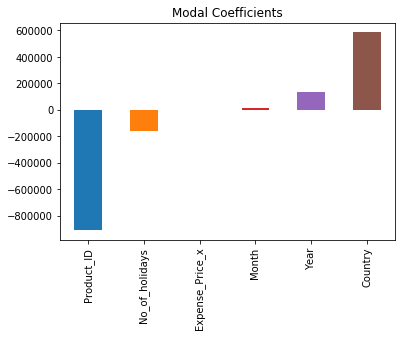

In [355]:
ridgeReg.fit(X,Y)
predictors = X.columns
coef = pd.Series(ridgeReg.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [342]:
from sklearn.linear_model import Lasso
lassoReg = Lasso(alpha=0.003, normalize=True)
kfold = model_selection.KFold(n_splits=3, random_state=25)
cv_results = model_selection.cross_val_score(lassoReg, X.values, Y.values, cv=kfold, scoring=smape)
print(cv_results.mean())
lassoReg.fit(X,Y)

# pred = lassoReg.predict(x_cv)

17094.432973483832


Lasso(alpha=0.003, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

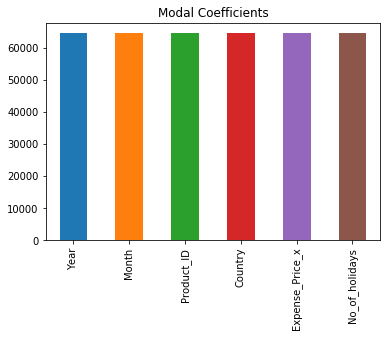

In [343]:
ridgeReg.fit(X,Y)
predictors = X.columns
coef = pd.Series(lassoReg.coef_[0],predictors).sort_values()
coef.plot(kind='bar', title='Modal Coefficients')

In [96]:
info_test.shape

(105, 5)

In [94]:
info2.shape

(388, 6)

In [266]:
model.fit(X.values,Y.values)

KNeighborsRegressor(algorithm='ball_tree', leaf_size=40, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=6, p=2,
          weights='uniform')

In [558]:
# Parameter tuning
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
def smape(estimator,X, A):
    F = estimator.predict(X)
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))
from sklearn.model_selection import GridSearchCV
param_test2 = {
 'n_estimators': 5,
 'bootstrap':True,
 'max_depth':3,
 'oob_score':True,
 'n_jobs':4
}
model = RandomForestRegressor(**param_test2)
kfold = model_selection.KFold(n_splits=3, random_state=25)
cv_results = model_selection.cross_val_score(model, X.values, Y.values, cv=kfold, scoring=smape)
print(cv_results.mean())
# gsearch2 = GridSearchCV(estimator = KNeighborsRegressor(),param_grid = param_test2, scoring=smape,n_jobs=4,iid=False, cv=3)
# # print(gsearch2)
# gsearch2.fit(info2[[cols for cols in info2.columns if cols not in['Sales']]],info2[['Sales']])
# gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Akhand\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:724: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were 

1715872.3602927178


In [121]:
model.fit(X.values,Y.values)

C:\Users\Akhand\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=15,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=4,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [637]:
# info_t = info2.iloc[:,1:]
# y_predict = model.predict(info_t.values)
# y_predict = list(y_predict)
submission = pd.DataFrame({'S_No':test['S_No'],'Year':test['Year'],'Month':test['Month'],'Product_ID':test['Product_ID'],'Country':test['Country'],'Sales':result},columns=['S_No','Year', 'Month', 'Product_ID', 'Country', 'Sales'])
submission['Sales'] = submission['Sales'].astype(int)
submission.to_csv('IV_submission.csv',index = False)